In [2]:
#Grand Ol’ Smashin’ Finale

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('video_games.csv')
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,7.5,NaN,NaN,NaN


In [4]:
median = df['Critic_Score'].median()

In [5]:
df['Critic_Score'] = df['Critic_Score'].fillna(value = median)

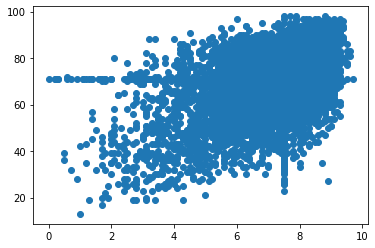

In [6]:
plt.figure()
plt.scatter(x = df['User_Score'], y = df['Critic_Score'])
plt.show()

In [7]:
#What is the correlation coefficient between Critic_Score and User_Score?

df['User_Score'].corr(df['Critic_Score'])

0.4785731396832186

In [10]:
#Plot the top 5 best selling games released before the year 2000

gamesyearfilter = df['Year_of_Release'] < 2000

df_yearfilter = df[gamesyearfilter]

df_yearfilter.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,NaN,7.5,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,NaN,7.5,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,NaN,7.5,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,NaN,7.5,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,71.0,NaN,7.5,NaN,NaN,NaN


In [21]:
top5 = df_yearfilter.sort_values('Global_Sales', ascending = False).head(5)
top5

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,NaN,7.5,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,NaN,7.5,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,NaN,7.5,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,NaN,7.5,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,71.0,NaN,7.5,NaN,NaN,NaN


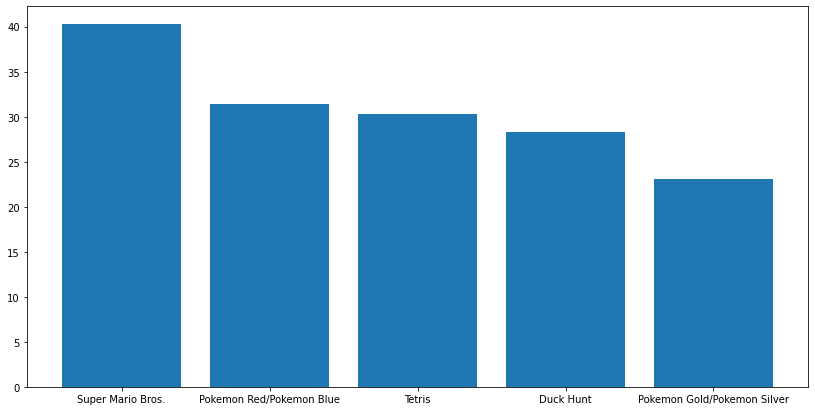

In [26]:
plt.figure(figsize = (14,7))
plt.bar(x = top5['Name'], height = top5['Global_Sales'])
plt.show()

In [34]:
#Create a new column called Aggregate_Score, 
#which returns the proportional average between Critic Score and User_Score based on Critic_Count and User_Count. 
#Plot a horizontal bar chart of the top 5 highest rated games by Aggregate_Score, not published by Nintendo before the year 2000. 
#From this bar chart, what is the highest rated game by Aggregate_Score?

dfcriticcount = df['Critic_Count'].mean()
dfusercount = df['User_Count'].median()
df['Critic_Count'] = df['Critic_Count'].fillna(dfcriticcount)
df['User_Count'] = df['User_Count'].fillna(dfusercount)

In [46]:
df['Aggerate_Score'] = ((df['Critic_Count'] * df['Critic_Score']) + (df['User_Count'] * (df['User_Score']*10))) / (df['User_Count'] + df['Critic_Count']) 

In [50]:
gamesyearfilter = df['Year_of_Release'] < 2000
gamespublishfilter = df['Publisher'] != 'Nintendo'

In [56]:
new_df = df[gamesyearfilter & gamespublishfilter]
top_5 = new_df.sort_values('Aggerate_Score', ascending = False).head(5)

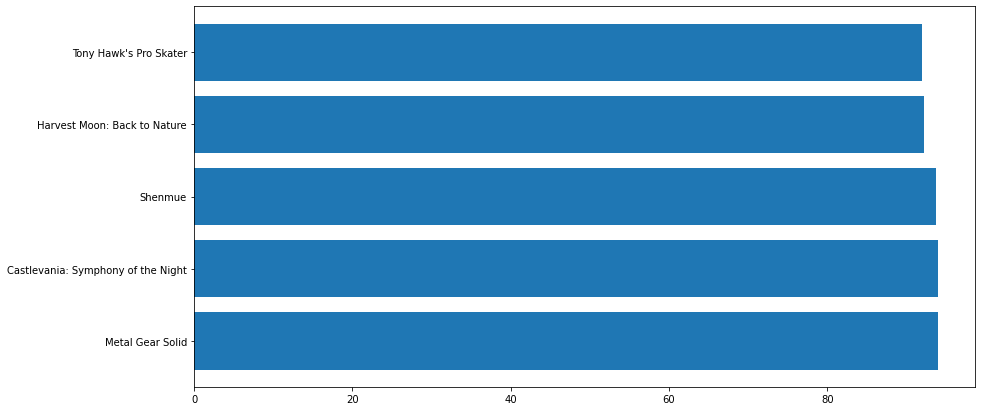

In [60]:
plt.figure(figsize = (14,7))
plt.barh(y = top_5['Name'], width = top_5['Aggerate_Score'])
plt.show()